# Module 6: Logistic Regression and Applying GLM

**_Authors: Favio Vázquez and Jessica Cervi_**


In this assignment, you will be working on more complicated Python functions, looking at Logistic Regression Models and how to apply GLM to them.

We begin by importing most of the libraries you will need throughout this assignment.

 <a id="questions"></a>
### Index:


- [Question 1](#q01)
- [Question 2](#q02)
- [Question 3](#q03)
- [Question 4](#q04)
- [Question 5](#q05)
- [Question 6](#q06)
- [Question 7](#q07)
- [Question 8](#q08)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Python Functions

<a id="q01"></a>
[Return to top](#questions)

## Question 1

Create a  Python function called `multiply` that takes a variable number of arguments  and multiplies them. Then multiply the numbers 1,6,3 and 8 and assign the result to a variable called `prod_total`. 

In [2]:
### GRADED

### YOUR SOLUTION HERE
def multiply(*args):
    total = 1
    for i in args:
        total = total*i
    return total

prod_total = multiply(1,6,3,8)
prod_temp = multiply(5,5)
prod_temp = multiply(8, 7)
print(prod_temp)
###
### YOUR CODE HERE
###

### Answer check
print("Result: {}".format(prod_total))

56
Result: 144


In [3]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q02"></a>
[Return to top](#questions)
## Question 2

Python functions can return multiple values. Create a Python function called `calculator` that takes two integers `a` and `b` and returns a tuple. The first element of the tuple must be the sum of `a` and `b`. The second element must be the square of their product.

Call the function with `a=6`, `b=10` and assign the sum to `add_values` and the squared product to `square_values`, respectively.

In [4]:
### GRADED

### YOUR SOLUTION HERE
a = 6
b = 10

def calculator(a, b):
    add = a+b
    square = (a*b)*(a*b)
    return add, square
    
add_values, square_values = calculator(a,b)

###
### YOUR CODE HERE
###

### Answer check
print("Sum: {}\nSquared product: {}".format(add_values, square_values))

Sum: 16
Squared product: 3600


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q03"></a>
[Return to top](#questions)
## Question 3

Define a function called `subtract` that takes two integers and computes the absolute value of their difference. The result must not be returned but set to the global variable `difference` instead.

Next, call the function `subtract` with arguments 7 and 9 and check the value of `difference`.

**Hint:** Do not assign the call of `subtract` to `difference` since the function returns `None` and doing so will override the current value of the global variable.

In [6]:
### GRADED
import math

### YOUR SOLUTION HERE
a = 7
b = 9

def subtract(a, b):
    global difference
    difference = (abs(a-b))

subtract(a,b)
print(difference)

###
### YOUR CODE HERE
###

### Answer check
print("The value of difference is: {}".format(difference))

2
The value of difference is: 2


In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Logistic Regression Models


In the first part, we will use a fake Instagram data set, indicating whether or not a particular instagram user clicked on an ad in their feed. We will create a model that predicts the likelihood of clicking on another ad based off the features of that user.

The data set contains the following features:

* 'Daily Time Spent on Instagram': user time spent on app in minutes
* 'Age': user age in years
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad feed headline': Headline of the Ad
* 'Location': current location of consumer
* 'Sex': 1 for male and 0 for female
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Feed': 0 or 1 indicated clicking on Feed

### Read the Data

In [8]:
insta_data = pd.read_csv('data/Mod6_insta.csv')

### Exploratory Data Analysis

Let's use Matplotlib and Seaborn to explore the data.

In [9]:
insta_data.head(10)

,Daily Time Spent on Instagram,Age,Daily Internet Usage,Ad feed Headline,Location,Sex,Country,Timestamp,Clicked on Feed
0,82.03,41,187.53,Intuitive dynamic attitude,Pruittmouth,0,Afghanistan,02-05-2016 07:00,0
1,80.03,44,150.84,Automated static concept,Christinetown,0,Afghanistan,23-07-2016 14:47,1
2,51.38,59,158.56,Object-based modular functionalities,East Anthony,0,Afghanistan,17-06-2016 17:11,1
3,77.07,40,261.02,Face-to-face analyzing encryption,Stephenborough,0,Afghanistan,01-03-2016 10:01,0
4,51.87,50,119.65,Team-oriented dynamic forecast,Kevinberg,0,Afghanistan,10-03-2016 22:28,1
5,45.99,33,124.61,Face-to-face methodical intranet,South Mark,1,Afghanistan,27-02-2016 15:04,1
6,61.88,45,108.18,Balanced disintermediate conglomeration,North Debrashire,0,Afghanistan,30-05-2016 08:02,1
7,68.01,25,188.32,Ameliorated actuating workforce,Kaylashire,1,Afghanistan,01-01-2016 03:35,0
8,72.84,26,238.63,Progressive empowering alliance,Wongland,0,Albania,08-07-2016 21:18,0
9,73.84,31,121.05,Programmable uniform productivity,South Jasminebury,0,Albania,18-06-2016 17:23,1


In [10]:
insta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Time Spent on Instagram  1000 non-null   float64
 1   Age                            1000 non-null   int64  
 2   Daily Internet Usage           1000 non-null   float64
 3   Ad feed Headline               1000 non-null   object 
 4   Location                       1000 non-null   object 
 5   Sex                            1000 non-null   int64  
 6   Country                        1000 non-null   object 
 7   Timestamp                      1000 non-null   object 
 8   Clicked on Feed                1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [11]:
insta_data.describe()

,Daily Time Spent on Instagram,Age,Daily Internet Usage,Sex,Clicked on Feed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,180.000100,0.481000,0.50000
std,15.853615,8.785562,43.902339,0.499889,0.50025
min,32.600000,19.000000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,138.830000,0.000000,0.00000
50%,68.215000,35.000000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,218.792500,1.000000,1.00000
max,91.430000,61.000000,269.960000,1.000000,1.00000


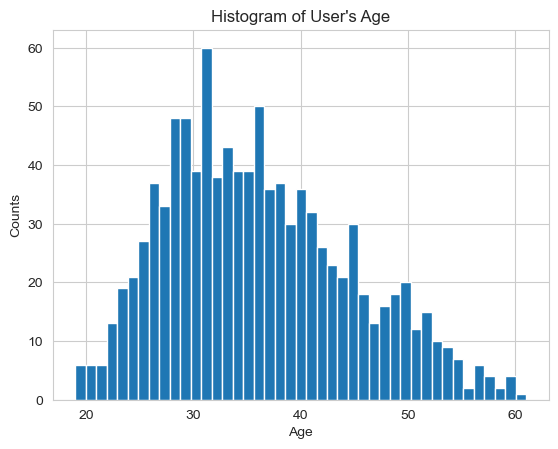

In [12]:
# Let's build a histogram for the user's age
sns.set_style('whitegrid')
insta_data['Age'].hist(bins=43)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title("Histogram of User's Age")
plt.show()

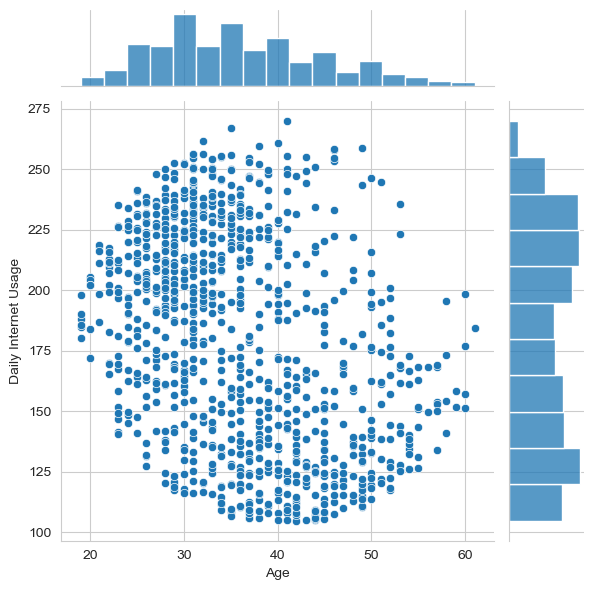

In [13]:
## Let's build a jointplot showing Daily Time Spent on Instagram versus Age.
sns.jointplot(x='Age',y='Daily Internet Usage',data=insta_data)
plt.show()

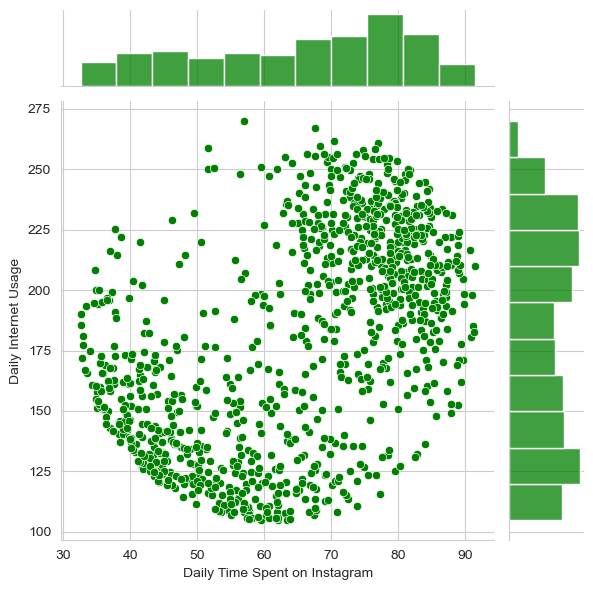

In [14]:
# Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'
sns.jointplot(x='Daily Time Spent on Instagram',y='Daily Internet Usage',data=insta_data,color='green')
plt.show()

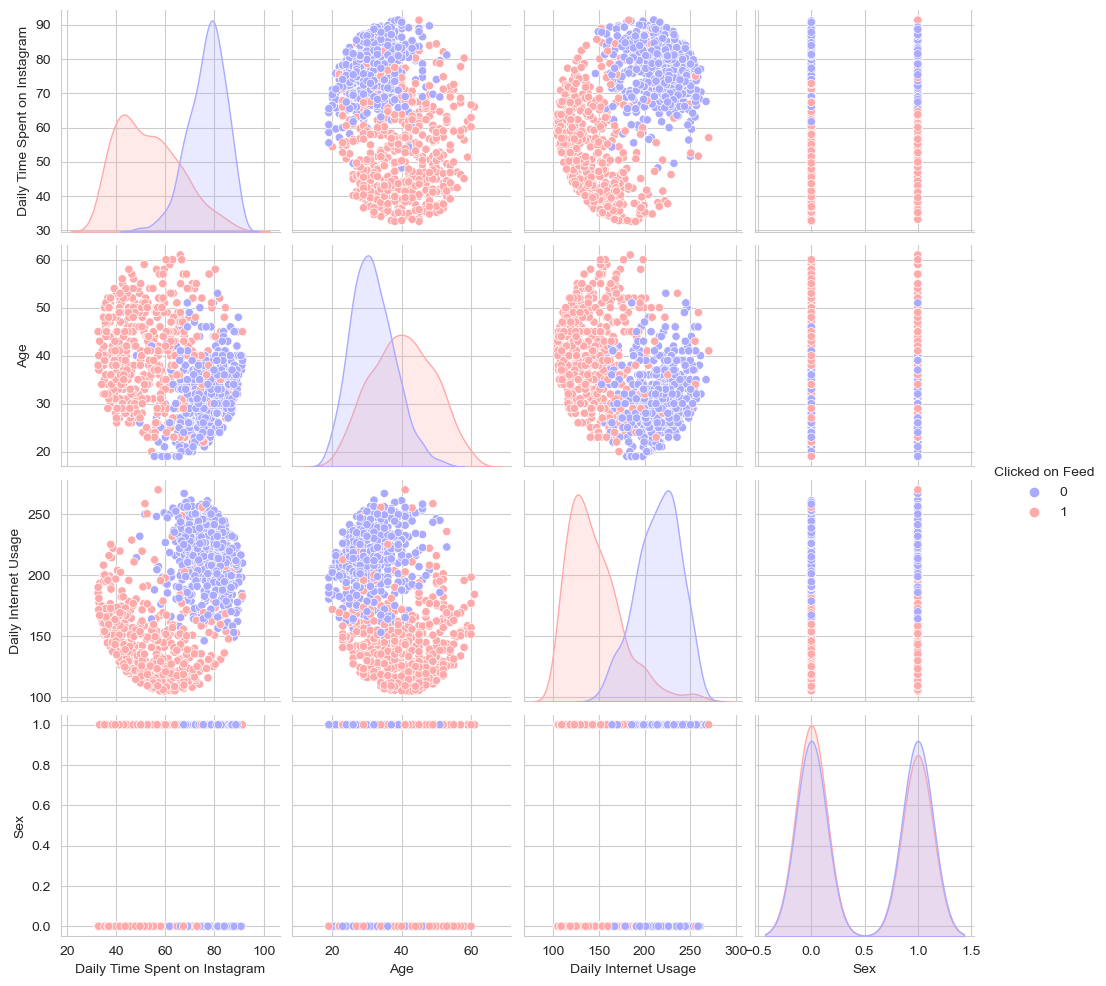

In [15]:
# Pairplot with a grouping defined by the 'Clicked on Ad' column feature.
sns.pairplot(insta_data,hue='Clicked on Feed',palette='bwr')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Instagram'>

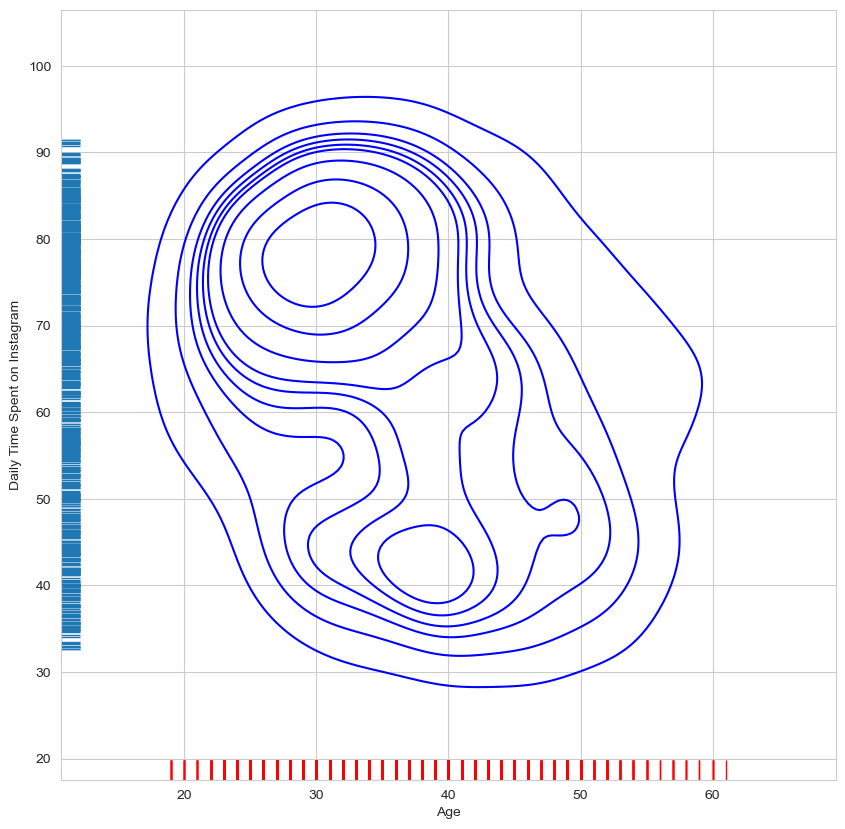

In [16]:
# How the user's age and the time spent on instagram are linked.
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(insta_data.Age, insta_data['Daily Time Spent on Instagram'], color="b", ax=ax)
sns.rugplot(insta_data.Age, color="r", ax=ax)
sns.rugplot(insta_data['Daily Time Spent on Instagram'], vertical=True, ax=ax)

### Data preparation

We have several categorical variables:

In [17]:
insta_data.select_dtypes(include='object').describe()

,Ad feed Headline,Location,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,997
top,Intuitive dynamic attitude,Lisamouth,France,26-05-2016 15:40
freq,1,3,9,2


As we can see here, we have a lot of variability in the Ad feed headline, such as the location and country of the user, so for this example we will not use them. 

You will eliminate these variables in question 4, and then in question 5 you will deal with the timestamp.

<a id="q04"></a>
[Return to top](#questions)
## Question 4

Eliminate the variables `Ad feed Headline`, `Location` and `Country` from `insta_data` and save your resulting dataframe in a variable called `df`. 

In [18]:
x = insta_data.select_dtypes(include='object').describe()
y = x.columns
y = y[:3]
y

Index(['Ad feed Headline', 'Location', 'Country'], dtype='object')

In [19]:
### GRADED

### YOUR SOLUTION HERE
#insta_data.head(5)
df = insta_data
df = df.drop(y, axis = 1)
df.head(5)

###
### YOUR CODE HERE
###


,Daily Time Spent on Instagram,Age,Daily Internet Usage,Sex,Timestamp,Clicked on Feed
0,82.03,41,187.53,0,02-05-2016 07:00,0
1,80.03,44,150.84,0,23-07-2016 14:47,1
2,51.38,59,158.56,0,17-06-2016 17:11,1
3,77.07,40,261.02,0,01-03-2016 10:01,0
4,51.87,50,119.65,0,10-03-2016 22:28,1


In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now let's see our new dataframe

In [21]:
df.head()

,Daily Time Spent on Instagram,Age,Daily Internet Usage,Sex,Timestamp,Clicked on Feed
0,82.03,41,187.53,0,02-05-2016 07:00,0
1,80.03,44,150.84,0,23-07-2016 14:47,1
2,51.38,59,158.56,0,17-06-2016 17:11,1
3,77.07,40,261.02,0,01-03-2016 10:01,0
4,51.87,50,119.65,0,10-03-2016 22:28,1


In [22]:
# Change the name of the variables so it's easier to work with them
df.columns = ["time_instagram", "age", "time_internet", "sex", "timestamp", "clicked"]

In [23]:
df.head()

,time_instagram,age,time_internet,sex,timestamp,clicked
0,82.03,41,187.53,0,02-05-2016 07:00,0
1,80.03,44,150.84,0,23-07-2016 14:47,1
2,51.38,59,158.56,0,17-06-2016 17:11,1
3,77.07,40,261.02,0,01-03-2016 10:01,0
4,51.87,50,119.65,0,10-03-2016 22:28,1


<a id="q05"></a>
[Return to top](#questions)
## Question 5

Extract time features from the `timestamp` and create the variables:

- `month`: The month when the ad was seen
- `day_of_month`: The day of the month when the ad was seen
- `day_of_week`: The day of the week when the ad was seen
- `hour`: The hour of the day when the ad was seen

Extract the values as numeric features. Then add those features to the dataframe (`df`) as columns using the names indicated. Finally drop the `timestamp` column.

**Hint: Transform timestamp to a `datetime` type object.**

In [24]:
### GRADED

### YOUR SOLUTION HERE
# Remember to cast 'timestamp' to a datetime object

df['timestamp'] = pd.to_datetime(df['timestamp'])


df['month'] = df['timestamp'].apply(lambda x:x.month)
df['day_of_month'] = df['timestamp'].apply(lambda x:x.day)
df["day_of_week"] = df['timestamp'].apply(lambda x:x.dayofweek)
df['hour'] = df['timestamp'].apply(lambda x:x.hour)
df = df.drop('timestamp', axis =1)

###
### YOUR CODE HERE
###


In [25]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [26]:
df.head(10)

,time_instagram,age,time_internet,sex,clicked,month,day_of_month,day_of_week,hour
0,82.03,41,187.53,0,0,2,5,4,7
1,80.03,44,150.84,0,1,7,23,5,14
2,51.38,59,158.56,0,1,6,17,4,17
3,77.07,40,261.02,0,0,1,3,6,10
4,51.87,50,119.65,0,1,10,3,0,22
5,45.99,33,124.61,1,1,2,27,5,15
6,61.88,45,108.18,0,1,5,30,0,8
7,68.01,25,188.32,1,0,1,1,4,3
8,72.84,26,238.63,0,0,8,7,6,21
9,73.84,31,121.05,0,1,6,18,5,17


You will now write Python code to split the data and fit a logistic regression model. 

We will first need to split up our data into an `X` dataframe that contains the features to train on and a `y` Series with the target variable, which in this case will be the `clicked` column.

In [27]:
X = df[df.columns.difference(['clicked'])]
y = df['clicked']

In [28]:
print(X.head(5))
print(y)

   age  day_of_month  day_of_week  hour  month  sex  time_instagram  \
0   41             5            4     7      2    0           82.03   
1   44            23            5    14      7    0           80.03   
2   59            17            4    17      6    0           51.38   
3   40             3            6    10      1    0           77.07   
4   50             3            0    22     10    0           51.87   

   time_internet  
0         187.53  
1         150.84  
2         158.56  
3         261.02  
4         119.65  
0      0
1      1
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    0
999    0
Name: clicked, Length: 1000, dtype: int64


<a id="q06"></a>
[Return to top](#questions)
## Question 6

### Logistic Regression Model

Split the data into a **training** set and a **testing** set. We will train our model on the training set and then use the test set to evaluate it. Use 30% of the data for testing and the remaining for training. Use 6 as a random state.

In [29]:
from sklearn.model_selection import train_test_split
### GRADED

### YOUR SOLUTION HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

###
### YOUR CODE HERE
###


In [30]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q07"></a>
[Return to top](#questions)
## Question 7

Create and fit a Logistic Regression model using the training dataset. Save your fitted model in a variable called `model`.

Make sure to import LogisticRegression from `sklearn`. Use the `lbfgs` solver and `random_state` = 6 arguments when creating the model. Don't pass any other argument or changes to the logistic regression.

In [31]:
### GRADED

### YOUR SOLUTION HERE
from sklearn import linear_model

model = linear_model.LogisticRegression(random_state=6, solver='lbfgs').fit(X_train, y_train)

###
### YOUR CODE HERE
###


In [32]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q08"></a>
[Return to top](#questions)
## Question 8

### Model evaluation


Create a predictions variable using your fitted model and the test dataset; call it `y_pred`. Then get the accuracy score of your predictions and save it in a variable called `accuracy`. Finally get the confusion matrix for your predictions and save it in a variable called `confusion_mat`. 

**Hint: Use the `sklearn.metrics` module.**

In [33]:
### GRADED

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
### YOUR SOLUTION HERE
y_true = y_test
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
confusion_mat = confusion_matrix(y_true, y_pred)

###
### YOUR CODE HERE
###


In [34]:
print('Logistic regression accuracy: {}'.format(accuracy))

Logistic regression accuracy: 0.93


[[138   6]
 [ 15 141]]


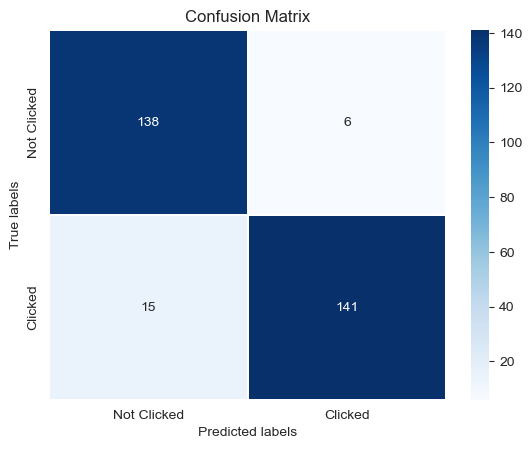

In [35]:
# Plot your confusion matrix
print(confusion_mat)

ax= plt.subplot()
sns.heatmap(confusion_mat, annot=True, fmt="d", ax = ax, linewidths=1.2, cmap="Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Clicked', 'Clicked']); ax.yaxis.set_ticklabels(['Not Clicked', 'Clicked']);

In [36]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Finally let's do a plot of our ROC while also getting the AUC.

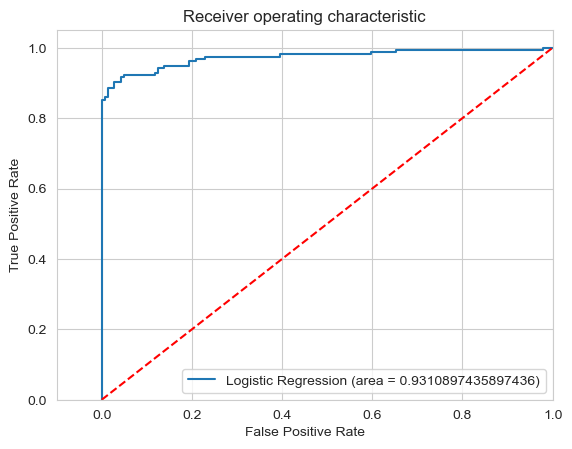

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = {})'.format(logit_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()